In [1]:
import pandas as pd

In [2]:
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
df = pd.read_csv(counties_url)
cal_counties_df = df[df['state'] == 'California']
ny_counties_df = df[df['state'] == 'New York']
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(states_url)
ny_df = df[df['state'] == 'New York']
cal_df = df[df['state'] == 'California']

In [7]:
cal_df['date'].min()



'2020-01-25'

In [8]:
ny_df['date'].min()

'2020-03-01'

In [9]:
#In order to get the line plots to line up correctly, we need to add those earlier dates with zero values to the New York Dataframe.

ny_add_dates = pd.date_range(start=cal_df['date'].min(), end=ny_df['date'].min()).sort_values(ascending=True)[0:-1]
ny_append_list = []
for dt in ny_add_dates:
    ny_append_list.append([dt.strftime("%Y-%m-%d"), 'New York', 36, 0, 0])
new_ny = pd.DataFrame(
    ny_append_list,
    columns = ["date", "state", "fips", "cases", "deaths"])
ny_extended_df = pd.concat([ny_df, new_ny]).sort_values(by='date')

In [10]:
#do some plotting

import matplotlib.pyplot as plt

# Plot a single line/location
def plot_loc(loc_df, name, col_name):
    fig, ax = plt.subplots()
    loc_df.plot(ax=ax, x='date', y=col_name, label=name, kind = 'line')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()
# Plot multiple lines/locations
def plot_locs(loc1, loc2, loc1_name, loc2_name, col_name):
    ax = loc1.plot(x='date', y=col_name, label=loc1_name, kind='line')
    loc2.plot(ax=ax, x='date', y=col_name, label=loc2_name, kind='line')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

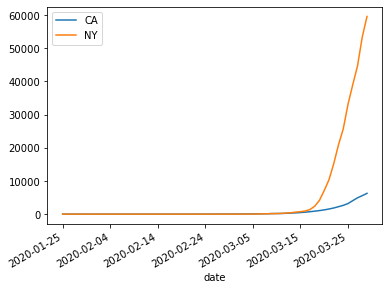

In [6]:
#First, we will look at California vs New York State:

plot_locs(cal_df, ny_extended_df, 'CA', 'NY', 'cases')

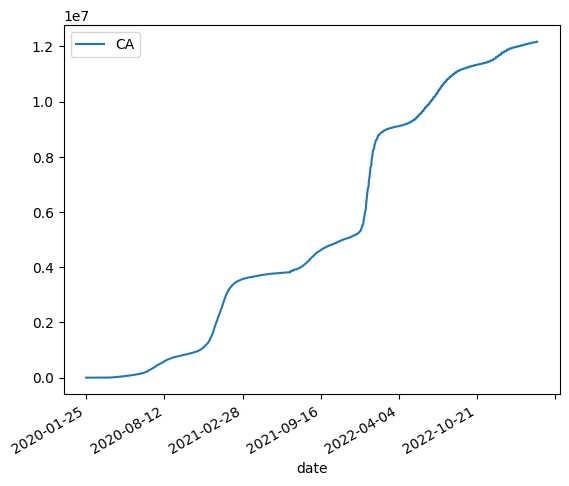

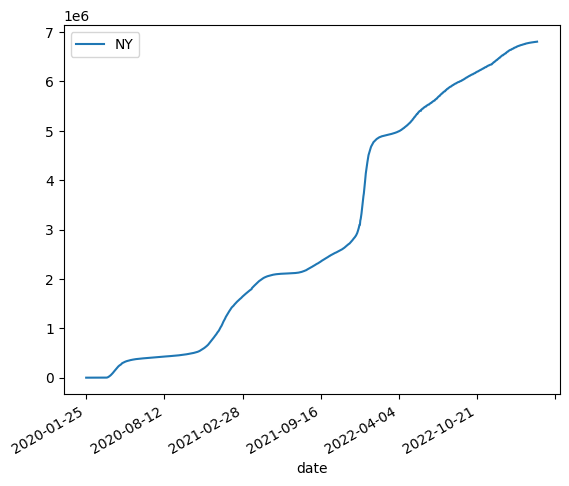

In [11]:
#First, New York did not get its first infection until over a month after California. Second, California is more than twice the size of New York.
#In other words, the situation in New York is very bad.

plot_loc(cal_df, 'CA', 'cases')
plot_loc(ny_extended_df, 'NY', 'cases')

In [12]:
#Now, let’s ask a different question: why is New York so bad? That is pretty hard to answer from this data, but we can ask where is New York so bad? This is much easier to answer, and it should be obvious: New York City.
#We can extract the New York City data with the following code:

nyc_df = ny_counties_df[ny_counties_df['county']=='New York City'].sort_values(by='date')
nyc_add_dates = pd.date_range(start=cal_df['date'].min(), end=nyc_df['date'].min()).sort_values(ascending=True)[0:-1]
nyc_append_list = []
for dt in nyc_add_dates:
    nyc_append_list.append([dt.strftime("%Y-%m-%d"),'New York City', 'New York', 36, 0, 0])
new_nyc = pd.DataFrame(
    nyc_append_list,
    columns = ["date", "county", "state", "fips", "cases", "deaths"])
nyc_extended_df = pd.concat([nyc_df, new_nyc]).sort_values(by='date')


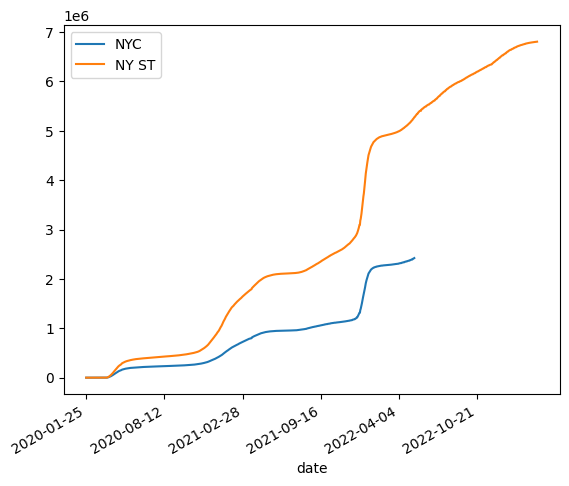

In [13]:
plot_locs(nyc_extended_df, ny_extended_df, 'NYC', 'NY ST', 'cases')